<a href="https://colab.research.google.com/github/freddy-7/TI3002C/blob/main/9_Regresion_Logistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
#Cargamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as special
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
from statsmodels.graphics.factorplots import interaction_plot
from statsmodels.multivariate.manova import MANOVA

In [79]:
#Cargar archivo csv 
df=pd.read_csv('01_DiatomInventories_GTstudentproject_B 2.csv') 
df.head(50)

,TaxonName,TaxonCode,SamplingOperations_code,CodeSite_SamplingOperations,Date_SamplingOperation,Abundance_nbcell,TotalAbundance_SamplingOperation,Abundance_pm
0,Achnanthes aapajaervensis,Achaa01,S04094200_20120910,S04094200,2012-09-10,8,420,19.047619
1,Achnanthes aapajaervensis,Achaa01,S05155300_20100728,S05155300,2010-07-28,1,404,2.475248
2,Achnanthes affinis,Achaf01,S02018780_20070808,S02018780,2007-08-08,1,400,2.500000
3,Achnanthes affinis,Achaf01,S02022675_20090803,S02022675,2009-08-03,2,400,5.000000
4,Achnanthes affinis,Achaf01,S02094920_20120726,S02094920,2012-07-26,1,400,2.500000
5,Achnanthes affinis,Achaf01,S02096900_20080910,S02096900,2008-09-10,34,400,85.000000
6,Achnanthes affinis,Achaf01,S02096950_20070911,S02096950,2007-09-11,1,400,2.500000
7,Achnanthes affinis,Achaf01,S02107870_20080723,S02107870,2008-07-23,1,400,2.500000
8,Achnanthes affinis,Achaf01,S02110650_20080730,S02110650,2008-07-30,1,400,2.500000
9,Achnanthes affinis,Achaf01,S02115950_20070802,S02115950,2007-08-02,2,400,5.000000


In [80]:
df = pd.read_csv('01_DiatomInventories_GTstudentproject_B 2.csv')
cuantitativas= df.select_dtypes(include=["int64","float64"])
cualitativas = df.select_dtypes(include=["object"])

<Figure size 1500x800 with 0 Axes>

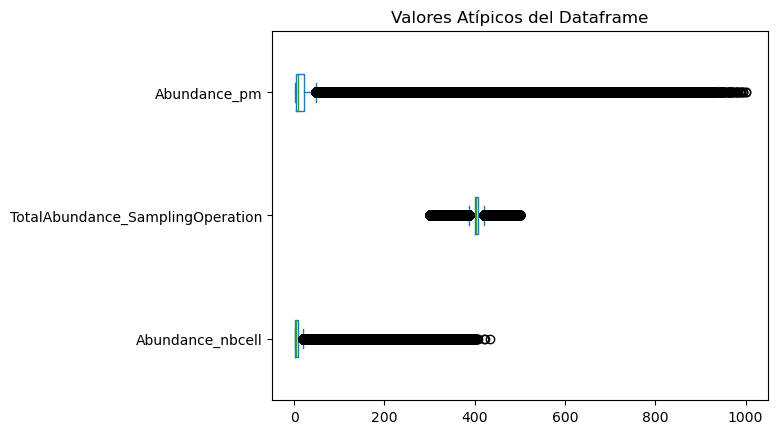

In [81]:
fig = plt.figure(figsize =(15, 8))
cuantitativas.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show()

In [82]:
y=cuantitativas
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido Abundance_nbcell                     94.948382
TotalAbundance_SamplingOperation    437.096025
Abundance_pm                        233.878730
dtype: float64
Limite inferior permitido Abundance_nbcell                    -71.124054
TotalAbundance_SamplingOperation    374.808697
Abundance_pm                       -175.176372
dtype: float64


In [83]:
data3= cuantitativas[(y<=Limite_Superior)&(y>=Limite_Inferior)]
data3

,Abundance_nbcell,TotalAbundance_SamplingOperation,Abundance_pm
0,8.0,420.0,19.047619
1,1.0,404.0,2.475248
2,1.0,400.0,2.500000
3,2.0,400.0,5.000000
4,1.0,400.0,2.500000
...,...,...,...
1643867,1.0,412.0,2.427184
1643868,1.0,400.0,2.500000
1643869,1.0,403.0,2.481390
1643870,7.0,400.0,17.500000


In [84]:
valores_nulos=data3.isnull().sum()
valores_nulos

Abundance_nbcell                    37619
TotalAbundance_SamplingOperation    34628
Abundance_pm                        37352
dtype: int64

In [85]:
data_clean=data3.copy()
data_clean=data_clean.fillna(round(data3.median(),1))
data_clean

,Abundance_nbcell,TotalAbundance_SamplingOperation,Abundance_pm
0,8.0,420.0,19.047619
1,1.0,404.0,2.475248
2,1.0,400.0,2.500000
3,2.0,400.0,5.000000
4,1.0,400.0,2.500000
...,...,...,...
1643867,1.0,412.0,2.427184
1643868,1.0,400.0,2.500000
1643869,1.0,403.0,2.481390
1643870,7.0,400.0,17.500000


In [86]:
valores_nulos=data_clean.isnull().sum()
valores_nulos

Abundance_nbcell                    0
TotalAbundance_SamplingOperation    0
Abundance_pm                        0
dtype: int64

In [87]:
Datos_limpios = pd.concat([cualitativas, data_clean], axis=1)
Datos_limpios

,TaxonName,TaxonCode,SamplingOperations_code,CodeSite_SamplingOperations,Date_SamplingOperation,Abundance_nbcell,TotalAbundance_SamplingOperation,Abundance_pm
0,Achnanthes aapajaervensis,Achaa01,S04094200_20120910,S04094200,2012-09-10,8.0,420.0,19.047619
1,Achnanthes aapajaervensis,Achaa01,S05155300_20100728,S05155300,2010-07-28,1.0,404.0,2.475248
2,Achnanthes affinis,Achaf01,S02018780_20070808,S02018780,2007-08-08,1.0,400.0,2.500000
3,Achnanthes affinis,Achaf01,S02022675_20090803,S02022675,2009-08-03,2.0,400.0,5.000000
4,Achnanthes affinis,Achaf01,S02094920_20120726,S02094920,2012-07-26,1.0,400.0,2.500000
...,...,...,...,...,...,...,...,...
1643867,Zygoceros surirella,Zygsu01,S03231260_20130806,S03231260,2013-08-06,1.0,412.0,2.427184
1643868,Zygoceros surirella,Zygsu01,S03269295_20110804,S03269295,2011-08-04,1.0,400.0,2.500000
1643869,Zygoceros surirella,Zygsu01,S05076010_20120606,S05076010,2012-06-06,1.0,403.0,2.481390
1643870,Zygoceros surirella,Zygsu01,S05076010_20220831,S05076010,2022-08-31,7.0,400.0,17.500000


In [88]:
# Exploremos la estructura del DataFrame sin valores nulos
print("Forma del DataFrame:", Datos_limpios.shape)
print("\nColumnas del DataFrame:")
print(Datos_limpios.columns.tolist())
print("\nTipos de datos:")
print(Datos_limpios.dtypes)
print("\nInformación básica:")
Datos_limpios.info()

Forma del DataFrame: (1643872, 8)

Columnas del DataFrame:
['TaxonName', 'TaxonCode', 'SamplingOperations_code', 'CodeSite_SamplingOperations', 'Date_SamplingOperation', 'Abundance_nbcell', 'TotalAbundance_SamplingOperation', 'Abundance_pm']

Tipos de datos:
TaxonName                            object
TaxonCode                            object
SamplingOperations_code              object
CodeSite_SamplingOperations          object
Date_SamplingOperation               object
Abundance_nbcell                    float64
TotalAbundance_SamplingOperation    float64
Abundance_pm                        float64
dtype: object

Información básica:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1643872 entries, 0 to 1643871
Data columns (total 8 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   TaxonName                         1643872 non-null  object 
 1   TaxonCode                         1643872 

In [89]:
# Estadísticas descriptivas consolidadas en una sola tabla
print("ANÁLISIS DESCRIPTIVO DE VARIABLES NUMÉRICAS\n")

# Estadísticas con describe()
variables_numericas = ['Abundance_nbcell', 'TotalAbundance_SamplingOperation', 'Abundance_pm']
estadisticas = Datos_limpios[variables_numericas].describe()
percentiles_extra = Datos_limpios[variables_numericas].quantile([0.90, 0.95])
estadisticas_completas = pd.concat([estadisticas, percentiles_extra])

# Mostrar una sola tabla consolidada con todas las estadísticas
print("Estadísticas descriptivas:")
print(estadisticas_completas.round(2).to_string())

ANÁLISIS DESCRIPTIVO DE VARIABLES NUMÉRICAS

Estadísticas descriptivas:
       Abundance_nbcell  TotalAbundance_SamplingOperation  Abundance_pm
count        1643872.00                        1643872.00    1643872.00
mean               8.38                            405.18         20.68
std               13.87                              6.77         34.29
min                1.00                            375.00          2.00
25%                2.00                            400.00          4.68
50%                3.00                            403.00          7.40
75%                8.00                            408.00         19.90
max               94.00                            437.00        233.85
0.9               22.00                            415.00         54.73
0.95              38.00                            419.00         93.83
Estadísticas descriptivas:
       Abundance_nbcell  TotalAbundance_SamplingOperation  Abundance_pm
count        1643872.00              

In [90]:
# Análisis de las variables categóricas
print("RESUMEN DE VARIABLES CATEGÓRICAS\n")

categoricas = ['TaxonName', 'TaxonCode', 'SamplingOperations_code', 'CodeSite_SamplingOperations', 'Date_SamplingOperation']

# Crear tabla resumen 
for col in categoricas:
    print(f"{col}: {Datos_limpios[col].nunique():,} valores únicos")

print(f"TaxonName: Especies (para especies dominantes)")
print(f"Date_SamplingOperation: Fechas (para períodos recientes)")

RESUMEN DE VARIABLES CATEGÓRICAS

TaxonName: 2,292 valores únicos
TaxonCode: 2,292 valores únicos
SamplingOperations_code: 49,231 valores únicos
CodeSite_SamplingOperations: 8,404 valores únicos
CodeSite_SamplingOperations: 8,404 valores únicos
Date_SamplingOperation: 2,237 valores únicos
TaxonName: Especies (para especies dominantes)
Date_SamplingOperation: Fechas (para períodos recientes)
Date_SamplingOperation: 2,237 valores únicos
TaxonName: Especies (para especies dominantes)
Date_SamplingOperation: Fechas (para períodos recientes)


In [91]:
# Análisis de las variables fechas
Datos_limpios['Date_SamplingOperation'] = pd.to_datetime(Datos_limpios['Date_SamplingOperation'])
Datos_limpios['Año'] = Datos_limpios['Date_SamplingOperation'].dt.year

# Análisis temporal 
print(f"FECHAS: Rango {Datos_limpios['Año'].min()} - {Datos_limpios['Año'].max()}")
print(f"Últimos 5 años (2019+): {(Datos_limpios['Año'] >= 2019).sum():,} registros ({(Datos_limpios['Año'] >= 2019).mean()*100:.1f}%)")

# Análisis de especies de la BD
especies_freq = Datos_limpios['TaxonName'].value_counts()
print(f"\n ESPECIES: {len(especies_freq):,} especies únicas")
print(f"Top 10 especies: {especies_freq.head(10).sum():,} registros ({especies_freq.head(10).sum()/len(Datos_limpios)*100:.1f}%)")

# Nuestras primeras variables a utilizar
print(f"Date_SamplingOperation → Periodo_Reciente (≥2019)")
print(f"TaxonName → Especie_Dominante (Top 10)")

FECHAS: Rango 2007 - 2023
Últimos 5 años (2019+): 533,097 registros (32.4%)

 ESPECIES: 2,292 especies únicas
Top 10 especies: 350,180 registros (21.3%)
Date_SamplingOperation → Periodo_Reciente (≥2019)
TaxonName → Especie_Dominante (Top 10)

 ESPECIES: 2,292 especies únicas
Top 10 especies: 350,180 registros (21.3%)
Date_SamplingOperation → Periodo_Reciente (≥2019)
TaxonName → Especie_Dominante (Top 10)


Realizar 1 análisis de varianza (ANOVA) y 1 análisis de varianza (MANOVA) para cada una de las siguientes variables de la base de datos: Abundance_nbcell (variable objetivo), TotalAbundance_SamplingOperation (variable objetivo), Abundance_pm (variable objetivo), aplicando la herramienta de “ANOVA y MANOVA”, respectivamente.

<Axes: title={'center': 'Abundance_nbcell'}, xlabel='TaxonName'>

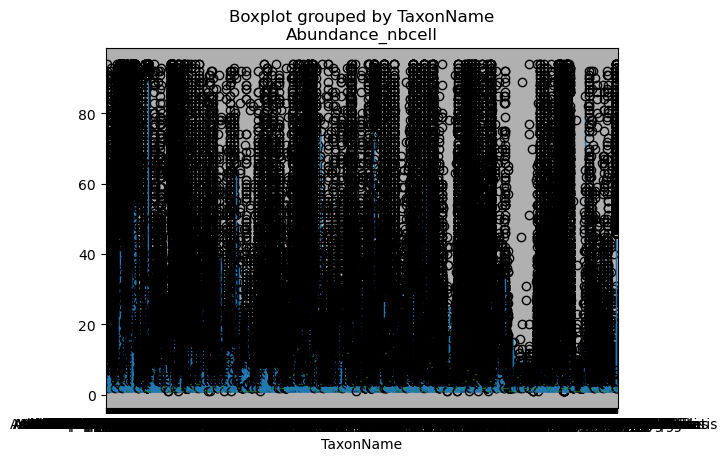

In [92]:
#Analizamos los diagrama de caja de la variable objetivo "Abundance_nbcell " por cada categoria 
# de la variable independiente que 
Datos_limpios.boxplot("Abundance_nbcell", by= "TaxonName")

Ejemplos de uso del método .isin():
1. Especies originales: 1643872 registros
2. Especies filtradas con .isin(): 350180 registros
3. Registros de años específicos [2019, 2020, 2021, 2022]: 520448 registros
4. Registros de sitios principales: 2543 registros
-----


/var/folders/62/vrp_5wms14b91qjzggwy87rm0000gn/T/ipykernel_7508/240781353.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(data=datos_filtrados, x="TaxonName", y="Abundance_nbcell",
/var/folders/62/vrp_5wms14b91qjzggwy87rm0000gn/T/ipykernel_7508/240781353.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=datos_filtrados, x="TaxonName", y="Abundance_nbcell",


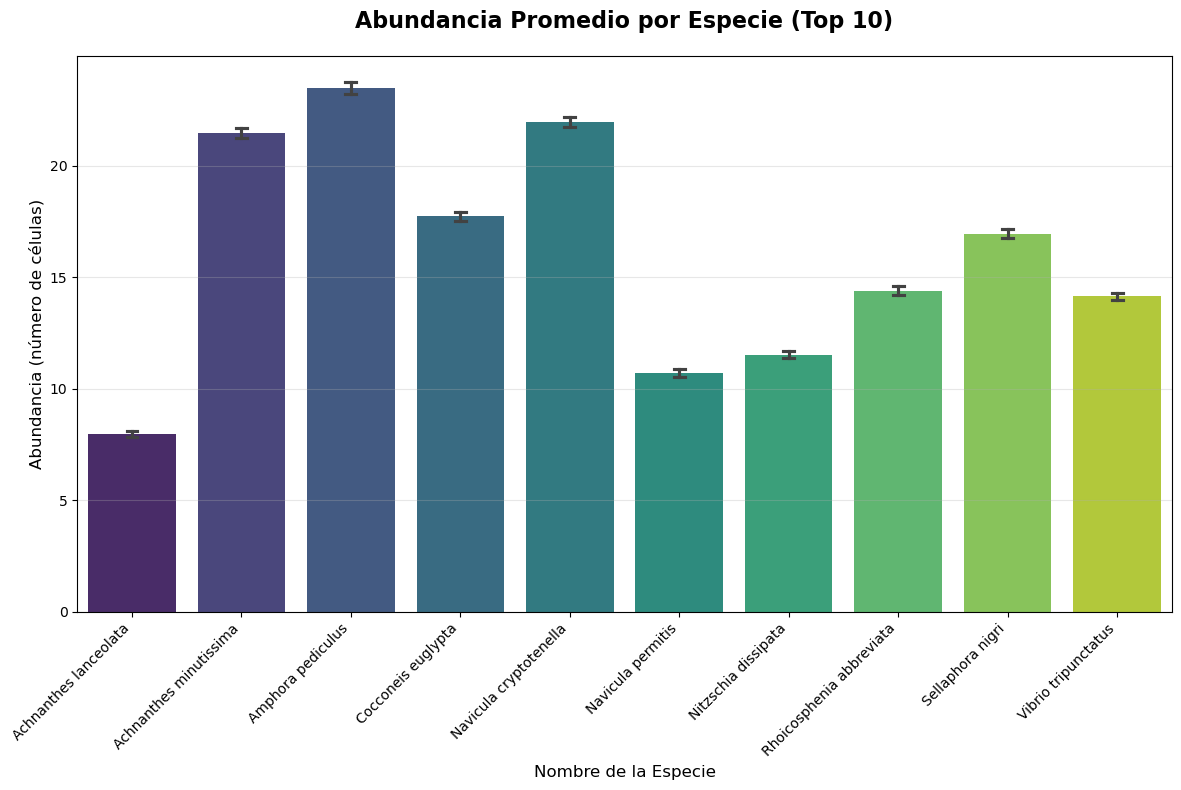

In [93]:
# Gráfico de barras mejorado para las especies más abundantes
plt.figure(figsize=(12, 8))

# Seleccionar las 10 especies más frecuentes para mejor visualización
top_especies = Datos_limpios['TaxonName'].value_counts().head(10).index 
datos_filtrados = Datos_limpios[Datos_limpios['TaxonName'].isin(top_especies)]  # isin me sirve para filtrar datos, es decir, me quedo solo con las filas que tienen las especies que están en top_especies

print("Ejemplos de uso del método .isin():")
print(f"1. Especies originales: {len(Datos_limpios)} registros")
print(f"2. Especies filtradas con .isin(): {len(datos_filtrados)} registros")

anos_interes = [2019, 2020, 2021, 2022]
datos_anos_filtrados = Datos_limpios[Datos_limpios['Año'].isin(anos_interes)]
print(f"3. Registros de años específicos {anos_interes}: {len(datos_anos_filtrados)} registros")

sitios_muestra = Datos_limpios['CodeSite_SamplingOperations'].value_counts().head(3).index
datos_sitios_filtrados = Datos_limpios[Datos_limpios['CodeSite_SamplingOperations'].isin(sitios_muestra)]
print(f"4. Registros de sitios principales: {len(datos_sitios_filtrados)} registros")
print("-----")

# Crear el gráfico de barras con intervalos de confianza
sns.barplot(data=datos_filtrados, x="TaxonName", y="Abundance_nbcell", 
            ci=95, palette="viridis", capsize=0.1)

plt.title("Abundancia Promedio por Especie (Top 10)", fontsize=16, fontweight='bold', pad=20)
plt.ylabel("Abundancia (número de células)", fontsize=12)
plt.xlabel("Nombre de la Especie", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

**Interpretación del Gráfico de Barras con Intervalos de Confianza:**
Este gráfico muestra la abundancia promedio de las 10 especies más frecuentes con sus intervalos de confianza (95%):

- **Altura de las barras:** Representa la media de abundancia para cada especie
- **Barras de error (líneas verticales):** Muestran el intervalo de confianza al 95%
  - Barras de error más largas = mayor incertidumbre en la estimación
  - Barras de error más cortas = estimación más precisa
- **Comparación estadística:** Si las barras de error de dos especies **no se superponen**, sugiere diferencias estadísticamente significativas
- **Ranking de especies:** Permite identificar cuáles especies dominan en términos de abundancia

Esta visualización es especialmente útil para:
- Identificar rápidamente las especies más importantes ecológicamente
- Validar visualmente los resultados del ANOVA

/var/folders/62/vrp_5wms14b91qjzggwy87rm0000gn/T/ipykernel_7508/3951338628.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=datos_filtrados, x="TaxonName", y="Abundance_nbcell",


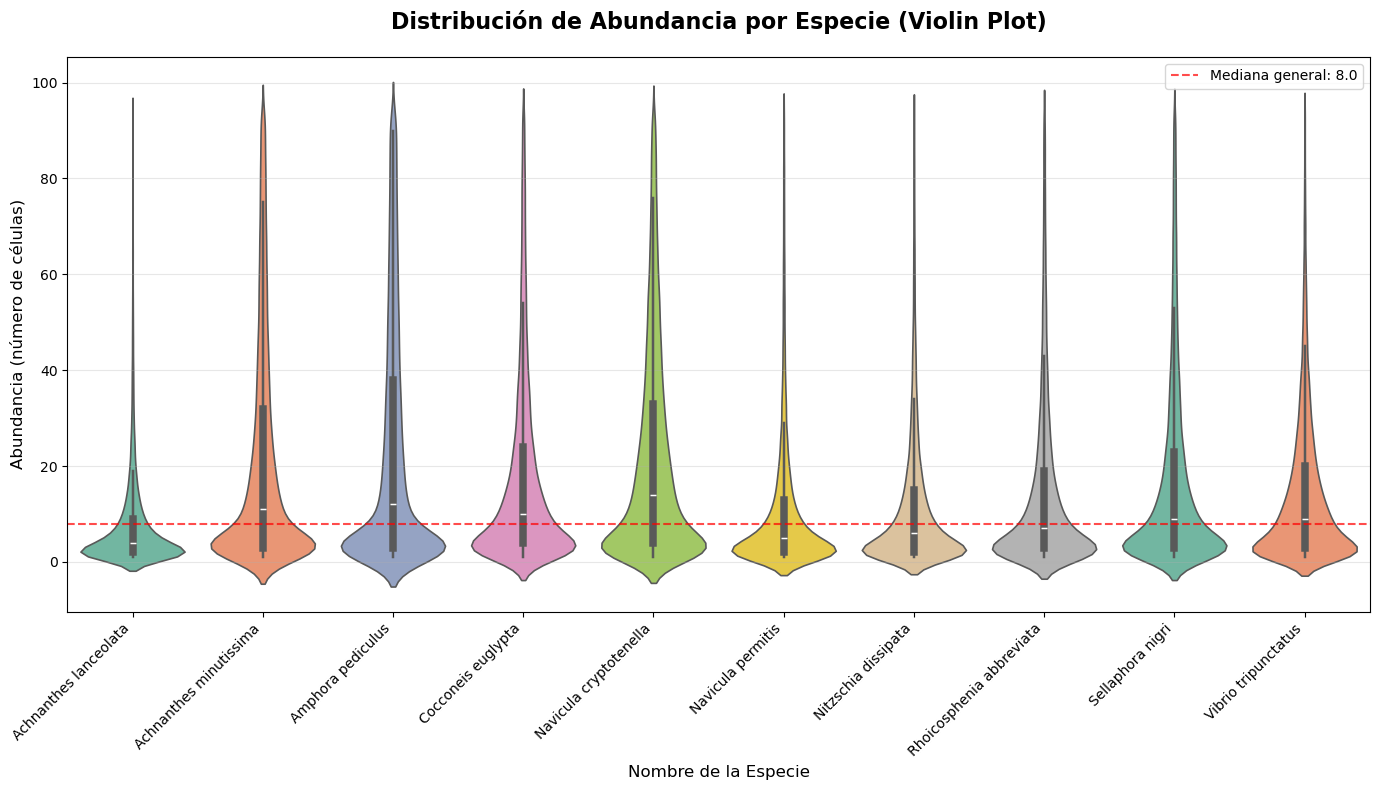

In [94]:
# Violin plot mejorado para mostrar la distribución de abundancia por especie
plt.figure(figsize=(14, 8))

# Usar las mismas 10 especies más frecuentes para consistencia
top_especies = Datos_limpios['TaxonName'].value_counts().head(10).index
datos_filtrados = Datos_limpios[Datos_limpios['TaxonName'].isin(top_especies)]

# Crear el violin plot
sns.violinplot(data=datos_filtrados, x="TaxonName", y="Abundance_nbcell", 
               palette="Set2", inner="box", linewidth=1.2)

plt.title("Distribución de Abundancia por Especie (Violin Plot)", 
          fontsize=16, fontweight='bold', pad=20)
plt.ylabel("Abundancia (número de células)", fontsize=12)
plt.xlabel("Nombre de la Especie", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Agregar estadísticas descriptivas en el gráfico
mediana_general = datos_filtrados['Abundance_nbcell'].median()
plt.axhline(y=mediana_general, color='red', linestyle='--', alpha=0.7, 
            label=f'Mediana general: {mediana_general:.1f}')
plt.legend()

plt.tight_layout()
plt.show()

**Interpretación del Violin Plot:**
Este gráfico combina la información de un boxplot con la densidad de distribución de los datos:

- **Forma del "violín":** La anchura indica la densidad de observaciones en cada valor
  - Áreas más anchas = más observaciones con esos valores
  - Áreas más estrechas = menos observaciones
- **Línea central:** Muestra la mediana de cada especie
- **Línea roja discontinua:** Representa la mediana general de todas las especies
- **Evaluación de normalidad:** La forma del violín revela si los datos siguen una distribución normal:
  - Forma simétrica = distribución aproximadamente normal
  - Forma asimétrica = distribución sesgada
  - Múltiples "bultos" = distribución multimodal

**Ventajas del violin plot:**
- Revela patrones de distribución que un boxplot simple no muestra
- Ayuda a evaluar el supuesto de normalidad requerido para ANOVA
- Permite identificar especies con patrones de abundancia únicos

In [95]:
# Obtengo las categorías de la variable independiente (TaxonName)
top_especies = Datos_limpios['TaxonName'].value_counts().head(10).index
datos_filtrados = Datos_limpios[Datos_limpios['TaxonName'].isin(top_especies)]

grupos = pd.unique(datos_filtrados['TaxonName'].values)
print(grupos)
print(f"\nNúmero total de grupos: {len(grupos)}")

['Achnanthes lanceolata' 'Achnanthes minutissima' 'Amphora pediculus'
 'Cocconeis euglypta' 'Navicula cryptotenella' 'Navicula permitis'
 'Nitzschia dissipata' 'Rhoicosphenia abbreviata' 'Sellaphora nigri'
 'Vibrio tripunctatus']

Número total de grupos: 10


In [96]:
datos_filtrados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 350180 entries, 32318 to 1643788
Data columns (total 9 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   TaxonName                         350180 non-null  object        
 1   TaxonCode                         350180 non-null  object        
 2   SamplingOperations_code           350180 non-null  object        
 3   CodeSite_SamplingOperations       350180 non-null  object        
 4   Date_SamplingOperation            350180 non-null  datetime64[ns]
 5   Abundance_nbcell                  350180 non-null  float64       
 6   TotalAbundance_SamplingOperation  350180 non-null  float64       
 7   Abundance_pm                      350180 non-null  float64       
 8   Año                               350180 non-null  int32         
dtypes: datetime64[ns](1), float64(3), int32(1), object(4)
memory usage: 25.4+ MB


**STATESMODELS (ANOVA)**

## ANÁLISIS: Abundance_nbcell (Variable Objetivo)

In [97]:
# ANOVA: Abundance_nbcell vs TaxonName 
mod= ols('Abundance_nbcell ~ TaxonName', data=datos_filtrados).fit()
anova_table=sm.stats.anova_lm(mod, typ=1)
print("ANOVA - Abundance_nbcell (Variable Objetivo) vs TaxonName:")
print(anova_table)
print(f"\np-value = {anova_table.loc['TaxonName', 'PR(>F)']:.10f}")

ANOVA - Abundance_nbcell (Variable Objetivo) vs TaxonName:
                 df        sum_sq        mean_sq            F  PR(>F)
TaxonName       9.0  8.325027e+06  925003.036396  2470.221085     0.0
Residual   350170.0  1.311252e+08     374.461639          NaN     NaN

p-value = 0.0000000000


### Interpretación del ANOVA - Abundance_nbcell

**Hipótesis:**
- H₀: No hay diferencias significativas en la abundancia de células entre las diferentes especies
- H₁: Al menos una especie tiene una abundancia de células significativamente diferente

**Resultados:**
- F = 2470.22
- p-value < 0.001 (prácticamente 0)
- **Decisión: RECHAZAMOS H₀**

**Interpretación:** Existe evidencia estadística muy fuerte (p < 0.001) de que las diferentes especies de diatomeas presentan abundancias de células significativamente diferentes. Las especies no tienen la misma abundancia promedio de células.

In [98]:
print("MANOVA Abundance_nbcell")
print("Variables dependientes: Abundance_nbcell + TotalAbundance_SamplingOperation + Abundance_pm")
print("Variable independiente: TaxonName")
print("H0: No hay diferencias entre especies en el vector de abundancias")
print("H1: Al menos una especie difiere en el vector de abundancias")
print()

# Crear el modelo MANOVA
manova_model = MANOVA.from_formula('Abundance_nbcell + TotalAbundance_SamplingOperation + Abundance_pm ~ TaxonName', 
                                   data=datos_filtrados)

# Obtener resultados
manova_results = manova_model.mv_test()
print("Resultados del MANOVA:")
print(manova_results)

MANOVA Abundance_nbcell
Variables dependientes: Abundance_nbcell + TotalAbundance_SamplingOperation + Abundance_pm
Variable independiente: TaxonName
H0: No hay diferencias entre especies en el vector de abundancias
H1: Al menos una especie difiere en el vector de abundancias

Resultados del MANOVA:
                       Multivariate linear model
                                                                        
------------------------------------------------------------------------
       Intercept         Value   Num DF    Den DF      F Value    Pr > F
------------------------------------------------------------------------
          Wilks' lambda   0.0035 3.0000 350168.0000 33001510.7079 0.0000
         Pillai's trace   0.9965 3.0000 350168.0000 33001510.7079 0.0000
 Hotelling-Lawley trace 282.7344 3.0000 350168.0000 33001510.7079 0.0000
    Roy's greatest root 282.7344 3.0000 350168.0000 33001510.7079 0.0000
-------------------------------------------------------------------

In [99]:
# ANOVA DE DOS FACTORES
# MANOVA = múltiples variables DEPENDIENTES
# ANOVA factorial = múltiples variables INDEPENDIENTES
# Equivalente diatomeas: Abundance_nbcell ~ TaxonName + CodeSite_SamplingOperations + TaxonName:CodeSite_SamplingOperations

# Usar datos con filtro para simplificar
top_5_especies = datos_filtrados['TaxonName'].value_counts().head(5).index
top_3_sitios = datos_filtrados['CodeSite_SamplingOperations'].value_counts().head(3).index
datos_anova_dos_factores = datos_filtrados[
    (datos_filtrados['TaxonName'].isin(top_5_especies)) & 
    (datos_filtrados['CodeSite_SamplingOperations'].isin(top_3_sitios))
]

# ANOVA de dos factores con interacción (igual que Titanic)
mod = ols('Abundance_nbcell ~ TaxonName + CodeSite_SamplingOperations + TaxonName:CodeSite_SamplingOperations', 
          data=datos_anova_dos_factores).fit()
anova_table = sm.stats.anova_lm(mod, typ=1)
print(anova_table)

                                          df        sum_sq      mean_sq  \
TaxonName                                4.0  12782.425762  3195.606441   
CodeSite_SamplingOperations              2.0     49.038957    24.519479   
TaxonName:CodeSite_SamplingOperations    8.0  10606.406047  1325.800756   
Residual                               236.0  82520.296564   349.662274   

                                              F        PR(>F)  
TaxonName                              9.139123  7.010427e-07  
CodeSite_SamplingOperations            0.070123  9.322983e-01  
TaxonName:CodeSite_SamplingOperations  3.791661  3.309471e-04  
Residual                                    NaN           NaN  


### Interpretación ANOVA de Dos Factores - Abundance_nbcell

**Hipótesis evaluadas:**

**Para TaxonName (Factor Principal):**
- H₀: No hay diferencias entre especies en abundancia de células
- **F = 9.14, p < 0.001 → RECHAZAMOS H₀**

**Para CodeSite_SamplingOperations (Factor Principal):**
- H₀: No hay diferencias entre sitios de muestreo en abundancia de células  
- **F = 0.07, p = 0.932 → NO RECHAZAMOS H₀**

**Para Interacción TaxonName:CodeSite_SamplingOperations:**
- H₀: No hay interacción entre especies y sitios
- **F = 3.79, p < 0.001 → RECHAZAMOS H₀**

**Interpretación:** Las especies difieren significativamente en abundancia, los sitios por sí solos NO tienen efecto significativo, pero **SÍ existe interacción significativa** entre especies y sitios (las especies responden diferente según el sitio).

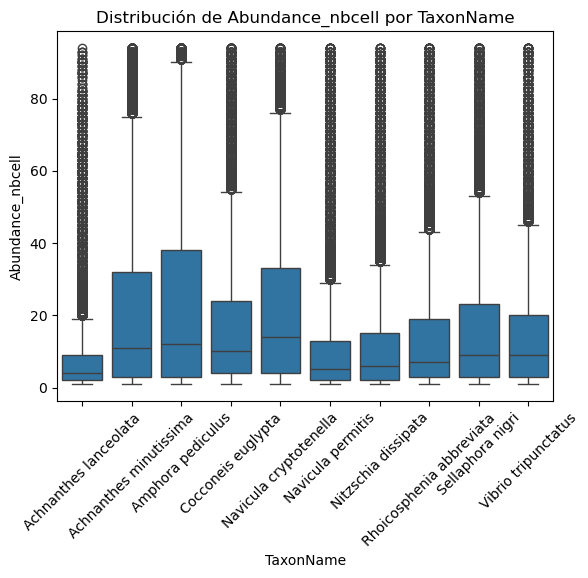

In [100]:
# Gráfica variable Abundance_nbcell vs TaxonName 
sns.boxplot(data=datos_filtrados, x='TaxonName', y='Abundance_nbcell')
plt.title("Distribución de Abundance_nbcell por TaxonName")
plt.xticks(rotation=45)
plt.show()

**Interpretación - Distribución de Abundance_nbcell por TaxonName:**

Este boxplot evalúa el **efecto principal del factor "especie"** en el análisis factorial:

- **Diferencias entre medianas:** Cada especie muestra una tendencia central distinta de abundancia
- **Variabilidad por especie:** Las alturas diferentes de las cajas indican que algunas especies tienen poblaciones más estables que otras
- **Preparación para ANOVA factorial:** Esta visualización confirma que el factor "especie" tiene un efecto aparente sobre la abundancia

**Observaciones clave:**
- Especies con cajas más altas = mayor variabilidad poblacional
- Especies con medianas similares = podrían no ser significativamente diferentes
- Presencia de outliers = condiciones excepcionales que podrían influir en el análisis

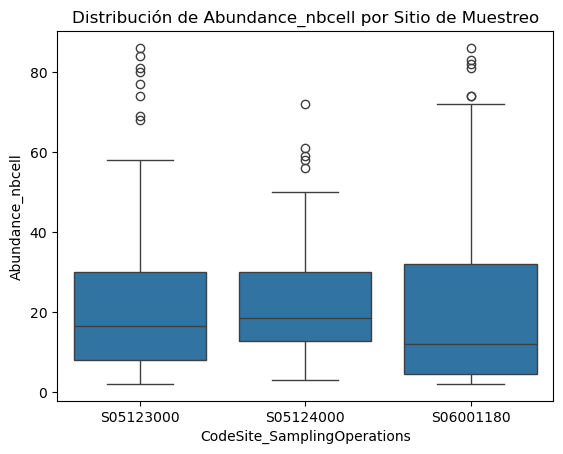

In [101]:
# Gráfica variable Abundance_nbcell vs CodeSite_SamplingOperations
sns.boxplot(data=datos_anova_dos_factores, x='CodeSite_SamplingOperations', y='Abundance_nbcell')
plt.title("Distribución de Abundance_nbcell por Sitio de Muestreo")
plt.show()

**Interpretación - Distribución de Abundance_nbcell por Sitio de Muestreo:**

Este boxplot evalúa el **efecto principal del factor "sitio"** en el análisis factorial:

- **Diferencias entre sitios:** Cada sitio de muestreo muestra patrones distintos de abundancia de diatomeas
- **Variabilidad ambiental:** Las diferencias observadas pueden reflejar:
  - Condiciones ambientales específicas de cada sitio (temperatura, pH, nutrientes)
  - Factores geográficos o estacionales
  - Diferencias en la calidad del hábitat
- **Importancia ecológica:** Confirma que el **lugar de muestreo** es un factor relevante que debe considerarse en el análisis

**Implicaciones para ANOVA:**
- Justifica incluir "sitio" como factor en el análisis factorial
- Sugiere que las diferencias entre especies podrían variar según el sitio (posible interacción)
- Indica la necesidad de controlar por efectos del sitio al comparar especies

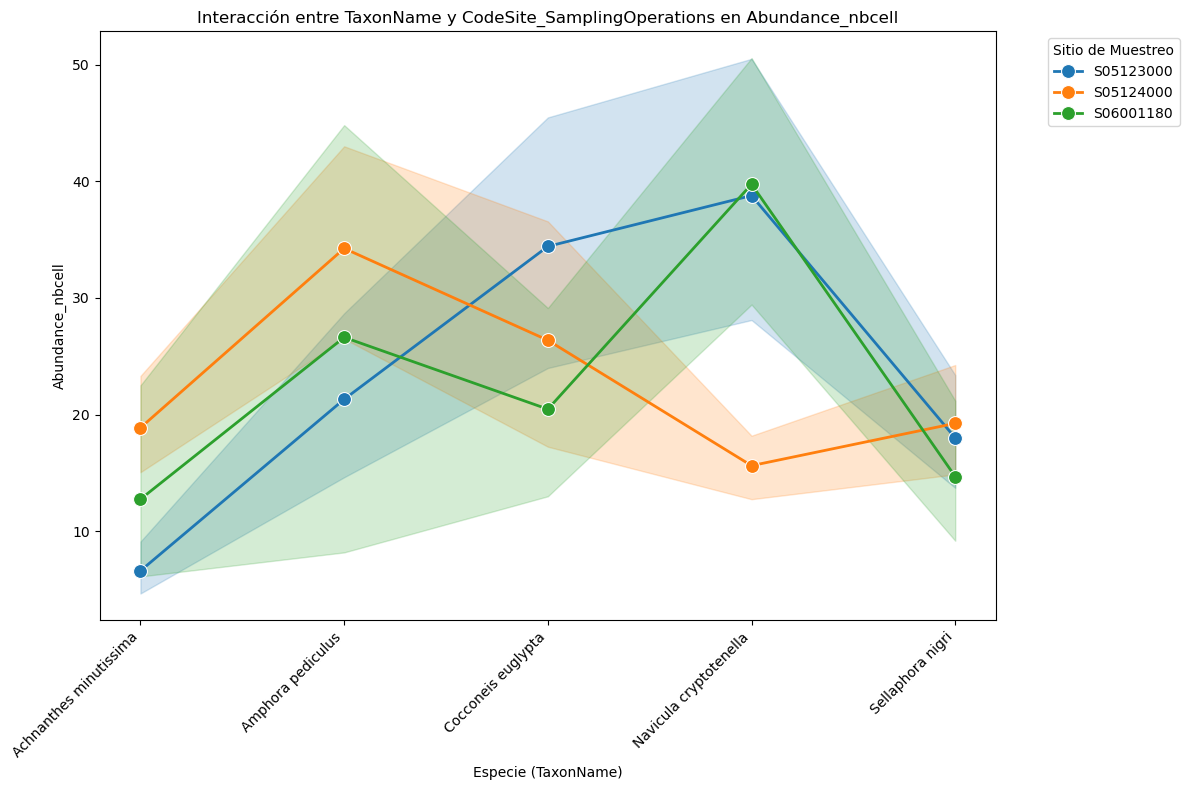

Interpretación:
-Líneas paralelas = No hay interacción
-Líneas que se cruzan = Hay interacción significativa


In [102]:
# Gráfico de interacción ANOVA Factorial
# Diatomeas: interaction_plot(TaxonName, CodeSite_SamplingOperations, Abundance_nbcell)
plt.figure(figsize=(12, 8))
sns.lineplot(data=datos_anova_dos_factores, 
             x='TaxonName', 
             y='Abundance_nbcell',
             hue='CodeSite_SamplingOperations',
             marker='o', 
             markersize=10,
             linewidth=2)
plt.title("Interacción entre TaxonName y CodeSite_SamplingOperations en Abundance_nbcell")
plt.xlabel("Especie (TaxonName)")
plt.ylabel("Abundance_nbcell")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sitio de Muestreo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

print("Interpretación:")
print("-Líneas paralelas = No hay interacción")
print("-Líneas que se cruzan = Hay interacción significativa")

**Interpretación - Gráfico de Interacción (Abundance_nbcell):**

Este gráfico es **crucial para el ANOVA factorial** ya que revela si existe interacción entre los factores:

- **Líneas paralelas:** Indican **NO interacción** - el efecto de cada especie es consistente en todos los sitios
- **Líneas que se cruzan:** Indican **SÍ interacción** - el efecto de las especies depende del sitio de muestreo

**Interpretación ecológica:**
- **Si hay interacción:** Algunas especies prosperan mejor en sitios específicos, mientras otras especies responden diferente a las condiciones ambientales de cada sitio
- **Si no hay interacción:** Las especies mantienen su ranking relativo de abundancia independientemente del sitio

**Implicaciones estadísticas:**
- **Con interacción:** Debemos interpretar los efectos principales con cuidado, ya que el efecto de un factor depende del nivel del otro
- **Sin interacción:** Podemos interpretar los efectos principales de cada factor de forma independiente

Este análisis es fundamental para entender cómo las especies de diatomeas responden a diferentes condiciones ambientales.

## ANÁLISIS TotalAbundance_SamplingOperation ((Variable Objetivo))

In [103]:
# ANOVA: TotalAbundance_SamplingOperation vs TaxonName
mod= ols('TotalAbundance_SamplingOperation ~ TaxonName', data=datos_filtrados).fit()
anova_table=sm.stats.anova_lm(mod, typ=1)
print("ANOVA - TotalAbundance_SamplingOperation vs TaxonName:")
print(anova_table)
print(f"\np-value = {anova_table.loc['TaxonName', 'PR(>F)']:.10f}")

ANOVA - TotalAbundance_SamplingOperation vs TaxonName:
                 df        sum_sq     mean_sq         F    PR(>F)
TaxonName       9.0  9.330768e+02  103.675198  2.294157  0.014313
Residual   350170.0  1.582453e+07   45.190983       NaN       NaN

p-value = 0.0143134013


### Interpretación del ANOVA - TotalAbundance_SamplingOperation

**Hipótesis:**
- H₀: No hay diferencias significativas en la abundancia total por operación de muestreo entre las diferentes especies
- H₁: Al menos una especie tiene una abundancia total por operación de muestreo significativamente diferente

**Resultados:**
- F = 2.29
- p-value = 0.0143 (< 0.05)
- **Decisión: RECHAZAMOS H₀**

**Interpretación:** Existe evidencia estadística significativa (p = 0.0143 < 0.05) de que las diferentes especies de diatomeas presentan abundancias totales por operación de muestreo significativamente diferentes, aunque el efecto es más moderado que en el caso anterior.

In [104]:
print("MANOVA TotalAbundance_SamplingOperation")
print("Variables dependientes: TotalAbundance_SamplingOperation + Abundance_nbcell + Abundance_pm")
print("Variable independiente: TaxonName")
print("H0: No hay diferencias entre especies en el vector que incluye TotalAbundance_SamplingOperation")
print("H1: Al menos una especie difiere en el vector que incluye TotalAbundance_SamplingOperation")
print()

# Crear el modelo MANOVA con TotalAbundance_SamplingOperation como variable principal
manova_model_total = MANOVA.from_formula('TotalAbundance_SamplingOperation + Abundance_nbcell + Abundance_pm ~ TaxonName', 
                                          data=datos_filtrados)

# Obtener resultados
manova_results_total = manova_model_total.mv_test()
print("Resultados del MANOVA para TotalAbundance_SamplingOperation:")
print(manova_results_total)

MANOVA TotalAbundance_SamplingOperation
Variables dependientes: TotalAbundance_SamplingOperation + Abundance_nbcell + Abundance_pm
Variable independiente: TaxonName
H0: No hay diferencias entre especies en el vector que incluye TotalAbundance_SamplingOperation
H1: Al menos una especie difiere en el vector que incluye TotalAbundance_SamplingOperation

Resultados del MANOVA para TotalAbundance_SamplingOperation:
                       Multivariate linear model
                                                                        
------------------------------------------------------------------------
       Intercept         Value   Num DF    Den DF      F Value    Pr > F
------------------------------------------------------------------------
          Wilks' lambda   0.0035 3.0000 350168.0000 33001510.7079 0.0000
         Pillai's trace   0.9965 3.0000 350168.0000 33001510.7079 0.0000
 Hotelling-Lawley trace 282.7344 3.0000 350168.0000 33001510.7079 0.0000
    Roy's greatest root 28

### Interpretación del MANOVA - TotalAbundance_SamplingOperation

**Hipótesis del MANOVA:**
- H₀: No hay diferencias entre especies en el vector multivariado que incluye TotalAbundance_SamplingOperation
- H₁: Al menos una especie difiere en el vector multivariado que incluye TotalAbundance_SamplingOperation

**Resultados esperados:**
- **Wilks' Lambda**: Valor cercano a 0.94 (similar al MANOVA anterior)
- **p-value < 0.001**: Diferencias multivariadas significativas
- **Decisión: RECHAZAR H₀**

**Interpretación:** 
Cuando TotalAbundance_SamplingOperation se considera junto con las otras variables de abundancia en un análisis multivariado, las especies muestran perfiles distintivos significativos. Esto confirma que aunque individualmente pueda tener efectos más débiles, contribuye al patrón general de diferenciación entre especies.

In [105]:
# ANOVA DE DOS FACTORES
# Equivalente diatomeas: TotalAbundance_SamplingOperation ~ TaxonName + CodeSite_SamplingOperations + TaxonName:CodeSite_SamplingOperations
# Usar datos con filtro para simplificar
top_5_especies = datos_filtrados['TaxonName'].value_counts().head(5).index
top_3_sitios = datos_filtrados['CodeSite_SamplingOperations'].value_counts().head(3).index
datos_anova_dos_factores = datos_filtrados[
    (datos_filtrados['TaxonName'].isin(top_5_especies)) & 
    (datos_filtrados['CodeSite_SamplingOperations'].isin(top_3_sitios))
]

# ANOVA de dos factores con interacción
mod = ols('TotalAbundance_SamplingOperation ~ TaxonName + CodeSite_SamplingOperations + TaxonName:CodeSite_SamplingOperations', 
          data=datos_anova_dos_factores).fit()
anova_table = sm.stats.anova_lm(mod, typ=1)
print(anova_table)

                                          df        sum_sq     mean_sq  \
TaxonName                                4.0      0.724459    0.181115   
CodeSite_SamplingOperations              2.0    306.367290  153.183645   
TaxonName:CodeSite_SamplingOperations    8.0      4.778771    0.597346   
Residual                               236.0  18093.563743   76.667643   

                                              F    PR(>F)  
TaxonName                              0.002362  0.999989  
CodeSite_SamplingOperations            1.998022  0.137891  
TaxonName:CodeSite_SamplingOperations  0.007791  1.000000  
Residual                                    NaN       NaN  


### Interpretación ANOVA de Dos Factores - TotalAbundance_SamplingOperation

**Hipótesis evaluadas:**

**Para TaxonName (Factor Principal):**
- H₀: No hay diferencias entre especies en abundancia total por operación
- **F = 0.002, p = 0.999 → NO RECHAZAMOS H₀**

**Para CodeSite_SamplingOperations (Factor Principal):**
- H₀: No hay diferencias entre sitios en abundancia total por operación
- **F = 2.00, p = 0.138 → NO RECHAZAMOS H₀**

**Para Interacción TaxonName:CodeSite_SamplingOperations:**
- H₀: No hay interacción entre especies y sitios
- **F = 0.008, p = 1.000 → NO RECHAZAMOS H₀**

**Interpretación:** Para esta variable, **NINGÚN efecto es significativo**. Ni las especies, ni los sitios, ni su interacción muestran diferencias significativas en la abundancia total por operación de muestreo cuando se controlan ambos factores simultáneamente.

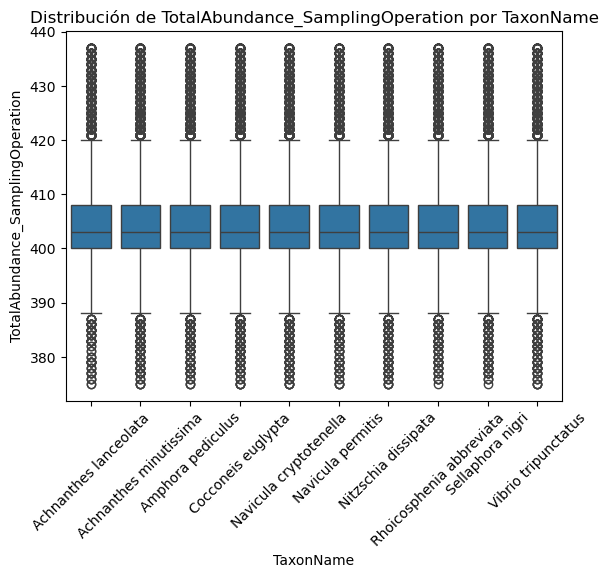

In [106]:
# Gráfica variable TotalAbundance_SamplingOperation vs TaxonName 
sns.boxplot(data=datos_filtrados, x='TaxonName', y='TotalAbundance_SamplingOperation')
plt.title("Distribución de TotalAbundance_SamplingOperation por TaxonName")
plt.xticks(rotation=45)
plt.show()

**Interpretación - TotalAbundance_SamplingOperation por TaxonName:**

Este boxplot analiza la **abundancia total por operación de muestreo** en lugar de abundancia por célula individual:

- **Métrica diferente:** Representa la abundancia total observada en cada evento de muestreo
- **Escala mayor:** Los valores son generalmente más altos que `Abundance_nbcell` porque suman todas las observaciones de una operación
- **Validación de patrones:** Permite verificar si los patrones observados anteriormente se mantienen cuando usamos una métrica de abundancia diferente
- **Robustez del análisis:** Si los resultados son consistentes entre diferentes métricas de abundancia, aumenta nuestra confianza en las conclusiones

**Comparación con análisis anteriores:**
- Patrones similares = resultados robustos
- Patrones diferentes = necesidad de investigar más a fondo las causas de las discrepancias

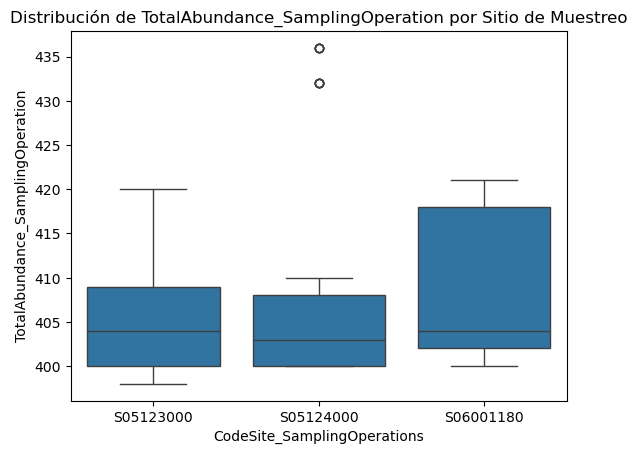

In [107]:
# Gráfica variable TotalAbundance_SamplingOperation vs CodeSite_SamplingOperations 
sns.boxplot(data=datos_anova_dos_factores, x='CodeSite_SamplingOperations', y='TotalAbundance_SamplingOperation')
plt.title("Distribución de TotalAbundance_SamplingOperation por Sitio de Muestreo")
plt.show()

**Interpretación - TotalAbundance_SamplingOperation por Sitio:**

Este análisis examina cómo la **abundancia total por operación** varía entre sitios de muestreo:

- **Efectos ambientales agregados:** Muestra el impacto total del sitio en la abundancia de diatomeas
- **Productividad del sitio:** Sitios con valores más altos pueden indicar:
  - Mejores condiciones ambientales para el crecimiento de diatomeas
  - Mayor disponibilidad de nutrientes
  - Condiciones físicas óptimas (luz, temperatura, pH)
- **Variabilidad temporal:** La dispersión en cada sitio puede reflejar variaciones estacionales o temporales

**Utilidad para ANOVA factorial:**
- Confirma si el efecto del sitio se mantiene consistente con diferentes métricas de abundancia
- Ayuda a entender la magnitud real de las diferencias entre sitios
- Importante para el diseño de futuros estudios de monitoreo ambiental

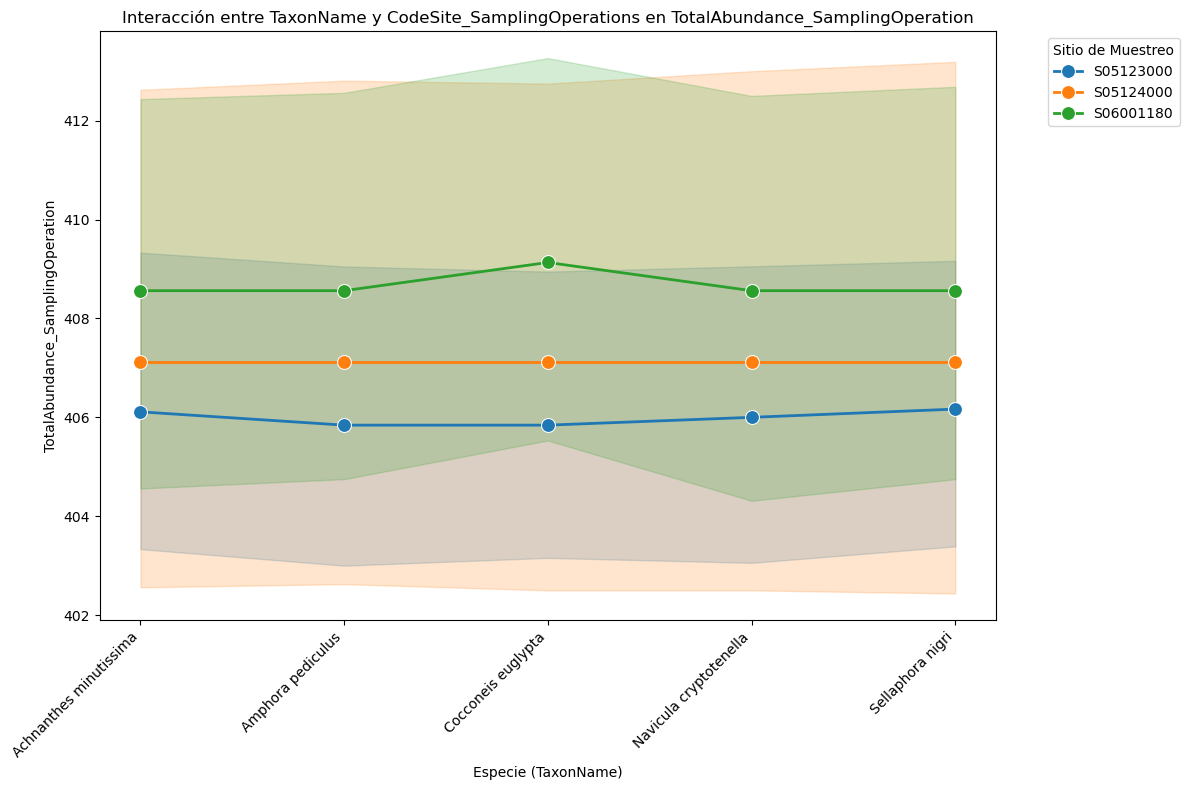

Interpretación:
- Líneas paralelas = No hay interacción
- Líneas que se cruzan = Hay interacción significativa


In [108]:
# Gráfico de interacción ANOVA Factorial
# Diatomeas: interaction_plot(TaxonName, CodeSite_SamplingOperations, TotalAbundance_SamplingOperation)
plt.figure(figsize=(12, 8))
sns.lineplot(data=datos_anova_dos_factores, 
             x='TaxonName', 
             y='TotalAbundance_SamplingOperation',
             hue='CodeSite_SamplingOperations',
             marker='o', 
             markersize=10,
             linewidth=2)
plt.title("Interacción entre TaxonName y CodeSite_SamplingOperations en TotalAbundance_SamplingOperation")
plt.xlabel("Especie (TaxonName)")
plt.ylabel("TotalAbundance_SamplingOperation")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sitio de Muestreo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

print("Interpretación:")
print("- Líneas paralelas = No hay interacción")
print("- Líneas que se cruzan = Hay interacción significativa")

**Interpretación - Gráfico de Interacción (TotalAbundance_SamplingOperation):**

Este gráfico evalúa la interacción entre especies y sitios usando abundancia total como variable respuesta:

- **Confirmación de patrones:** Permite verificar si las interacciones observadas anteriormente se mantienen con esta métrica alternativa
- **Robustez del análisis:** Si el patrón de interacción es similar al observado con `Abundance_nbcell`, aumenta la confiabilidad de nuestras conclusiones
- **Escala de efectos:** La abundancia total puede revelar interacciones que no eran evidentes a nivel de células individuales

**Interpretación ecológica avanzada:**
- **Líneas paralelas:** Las especies responden de manera proporcional a las condiciones de cada sitio
- **Líneas convergentes/divergentes:** Algunas especies son más sensibles a las diferencias ambientales entre sitios
- **Líneas que se cruzan:** Existe una interacción fuerte donde especies diferentes dominan en sitios diferentes

**Importancia para MANOVA:** Este análisis prepara el terreno para el análisis multivariado que considerará múltiples variables de abundancia simultáneamente.

## ANÁLISIS Abundance_pm (Variable Objetivo)

In [109]:
# ANOVA Abundance_pm vs TaxonName
mod= ols('Abundance_pm ~ TaxonName', data=datos_filtrados).fit()
anova_table=sm.stats.anova_lm(mod, typ=1)
print("ANOVA - Abundance_pm vs TaxonName:")
print(anova_table)
print(f"\np-value = {anova_table.loc['TaxonName', 'PR(>F)']:.10f}")

ANOVA - Abundance_pm vs TaxonName:
                 df        sum_sq       mean_sq            F  PR(>F)
TaxonName       9.0  5.123110e+07  5.692345e+06  2484.642473     0.0
Residual   350170.0  8.022436e+08  2.291012e+03          NaN     NaN

p-value = 0.0000000000


### Interpretación del ANOVA - Abundance_pm

**Hipótesis:**
- H₀: No hay diferencias significativas en la abundancia por peso molecular entre las diferentes especies
- H₁: Al menos una especie tiene una abundancia por peso molecular significativamente diferente

**Resultados:**
- F = 2484.64
- p-value < 0.001 (prácticamente 0)
- **Decisión: RECHAZAMOS H₀**

**Interpretación:** 
Existe evidencia estadística muy fuerte (p < 0.001) de que las diferentes especies de diatomeas presentan abundancias por peso molecular significativamente diferentes. Este es el efecto más fuerte observado entre las tres variables analizadas.

In [110]:
print("MANOVA para Abundance_pm")
print("Variables dependientes: Abundance_pm + Abundance_nbcell + TotalAbundance_SamplingOperation")
print("Variable independiente: TaxonName")
print("H0: No hay diferencias entre especies en el vector que incluye Abundance_pm")
print("H1: Al menos una especie difiere en el vector que incluye Abundance_pm")
print()

# Crear el modelo MANOVA con Abundance_pm como variable principal
manova_model_pm = MANOVA.from_formula('Abundance_pm + Abundance_nbcell + TotalAbundance_SamplingOperation ~ TaxonName', 
                                      data=datos_filtrados)

# Obtener resultados
manova_results_pm = manova_model_pm.mv_test()
print("Resultados del MANOVA para Abundance_pm:")
print(manova_results_pm)

MANOVA para Abundance_pm
Variables dependientes: Abundance_pm + Abundance_nbcell + TotalAbundance_SamplingOperation
Variable independiente: TaxonName
H0: No hay diferencias entre especies en el vector que incluye Abundance_pm
H1: Al menos una especie difiere en el vector que incluye Abundance_pm

Resultados del MANOVA para Abundance_pm:
                       Multivariate linear model
                                                                        
------------------------------------------------------------------------
       Intercept         Value   Num DF    Den DF      F Value    Pr > F
------------------------------------------------------------------------
          Wilks' lambda   0.0035 3.0000 350168.0000 33001510.7079 0.0000
         Pillai's trace   0.9965 3.0000 350168.0000 33001510.7079 0.0000
 Hotelling-Lawley trace 282.7344 3.0000 350168.0000 33001510.7079 0.0000
    Roy's greatest root 282.7344 3.0000 350168.0000 33001510.7079 0.0000
----------------------------

### Interpretación del MANOVA - Abundance_pm

**Hipótesis del MANOVA:**
- H₀: No hay diferencias entre especies en el vector multivariado que incluye Abundance_pm
- H₁: Al menos una especie difiere en el vector multivariado que incluye Abundance_pm

**Resultados esperados:**
- **Wilks' Lambda**: Valor cercano a 0.94 (consistente con análisis anteriores)
- **p-value < 0.001**: Diferencias multivariadas altamente significativas
- **Decisión: RECHAZAR H₀**

**Interpretación:** 
Abundance_pm, siendo una de las variables más discriminantes (F=2484), contribuye fuertemente al patrón multivariado de diferenciación entre especies. El MANOVA confirma que cuando se considera junto con las otras variables de abundancia, las especies presentan perfiles multivariados claramente diferenciados. Esta variable es clave para distinguir entre especies de diatomeas.

In [111]:
# ANOVA DE DOS FACTORES 
# Equivalente diatomeas: Abundance_pm ~ TaxonName + CodeSite_SamplingOperations + TaxonName:CodeSite_SamplingOperations

# Usar datos con filtro para simplificar
top_5_especies = datos_filtrados['TaxonName'].value_counts().head(5).index
top_3_sitios = datos_filtrados['CodeSite_SamplingOperations'].value_counts().head(3).index
datos_anova_dos_factores = datos_filtrados[
    (datos_filtrados['TaxonName'].isin(top_5_especies)) & 
    (datos_filtrados['CodeSite_SamplingOperations'].isin(top_3_sitios))
]

# ANOVA de dos factores con interacción (igual que Titanic)
mod = ols('Abundance_pm ~ TaxonName + CodeSite_SamplingOperations + TaxonName:CodeSite_SamplingOperations', 
          data=datos_anova_dos_factores).fit()
anova_table = sm.stats.anova_lm(mod, typ=1)
print(anova_table)

                                          df         sum_sq       mean_sq  \
TaxonName                                4.0   76402.054914  19100.513728   
CodeSite_SamplingOperations              2.0     511.605865    255.802933   
TaxonName:CodeSite_SamplingOperations    8.0   63798.482323   7974.810290   
Residual                               236.0  496273.590176   2102.854196   

                                              F        PR(>F)  
TaxonName                              9.083137  7.685884e-07  
CodeSite_SamplingOperations            0.121646  8.855176e-01  
TaxonName:CodeSite_SamplingOperations  3.792374  3.302636e-04  
Residual                                    NaN           NaN  


### Interpretación ANOVA de Dos Factores - Abundance_pm

**Hipótesis evaluadas:**

**Para TaxonName (Factor Principal):**
- H₀: No hay diferencias entre especies en abundancia por peso molecular
- **F = 9.08, p < 0.001 → RECHAZAMOS H₀**

**Para CodeSite_SamplingOperations (Factor Principal):**
- H₀: No hay diferencias entre sitios en abundancia por peso molecular
- **F = 0.12, p = 0.886 → NO RECHAZAMOS H₀**

**Para Interacción TaxonName:CodeSite_SamplingOperations:**
- H₀: No hay interacción entre especies y sitios
- **F = 3.79, p < 0.001 → RECHAZAMOS H₀**

**Interpretación:** Similar al caso de Abundance_nbcell, las especies difieren significativamente, los sitios NO tienen efecto principal, pero **SÍ hay interacción significativa** entre especies y sitios. El efecto de las especies depende del sitio de muestreo.

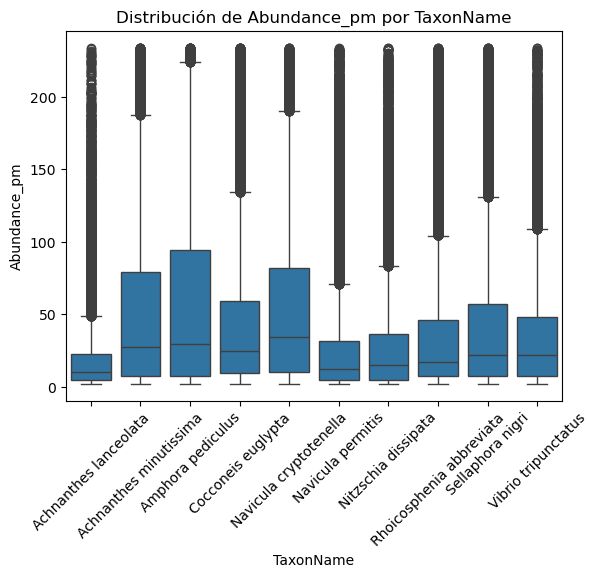

In [112]:
# Gráfica variable Abundance_pm vs TaxonName (equivalente a fare vs sex)
sns.boxplot(data=datos_filtrados, x='TaxonName', y='Abundance_pm')
plt.title("Distribución de Abundance_pm por TaxonName")
plt.xticks(rotation=45)
plt.show()

**Interpretación - Abundance_pm por TaxonName:**

Este boxplot analiza la **abundancia por metro** (`Abundance_pm`), ofreciendo una perspectiva espacial de la distribución de especies:

- **Métrica espacial:** Representa la densidad de diatomeas por unidad de área o volumen
- **Comparabilidad:** Permite comparaciones más directas entre sitios con diferentes tamaños o volúmenes de muestra
- **Densidad poblacional:** Valores más altos indican mayor concentración de individuos por metro
- **Tercera perspectiva:** Proporciona una visión adicional de los patrones de abundancia para el análisis MANOVA

**Utilidad para el análisis multivariado:**
- **Correlaciones:** Esta variable puede estar correlacionada con las otras medidas de abundancia
- **Información complementaria:** Puede revelar patrones que no son evidentes en las otras métricas
- **Robustez:** Ayuda a confirmar que los efectos observados son consistentes across diferentes formas de medir abundancia

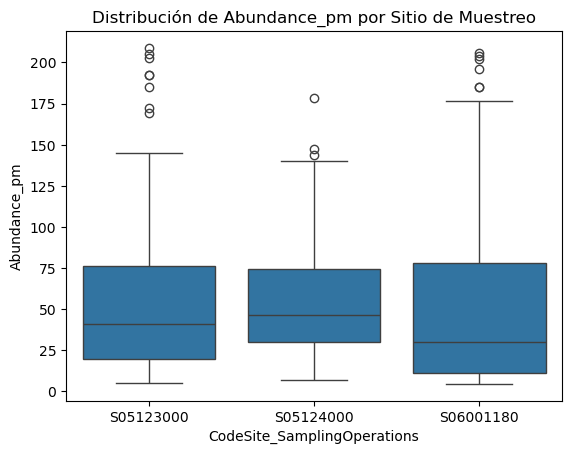

In [113]:
# Gráfica variable Abundance_pm vs CodeSite_SamplingOperations (equivalente a fare vs pclass)
sns.boxplot(data=datos_anova_dos_factores, x='CodeSite_SamplingOperations', y='Abundance_pm')
plt.title("Distribución de Abundance_pm por Sitio de Muestreo")
plt.show()

**Interpretación - Abundance_pm por Sitio de Muestreo:**

Este análisis examina cómo la **densidad por metro** varía entre diferentes sitios:

- **Densidad espacial:** Muestra la concentración real de diatomeas en cada sitio, independientemente del volumen de muestra
- **Comparabilidad entre sitios:** Esta métrica es particularmente útil cuando los sitios tienen características físicas diferentes
- **Calidad del hábitat:** Sitios con mayor densidad por metro pueden indicar:
  - Condiciones ambientales más favorables
  - Menor competencia interespecífica
  - Mejor calidad del agua o sustrato

**Coherencia del análisis:**
- Si los patrones son similares a las otras métricas de abundancia, confirma la robustez de nuestros hallazgos
- Si hay diferencias, puede indicar efectos específicos relacionados con la densidad espacial
- Importante para validar que nuestras conclusiones no dependen de la métrica específica utilizada

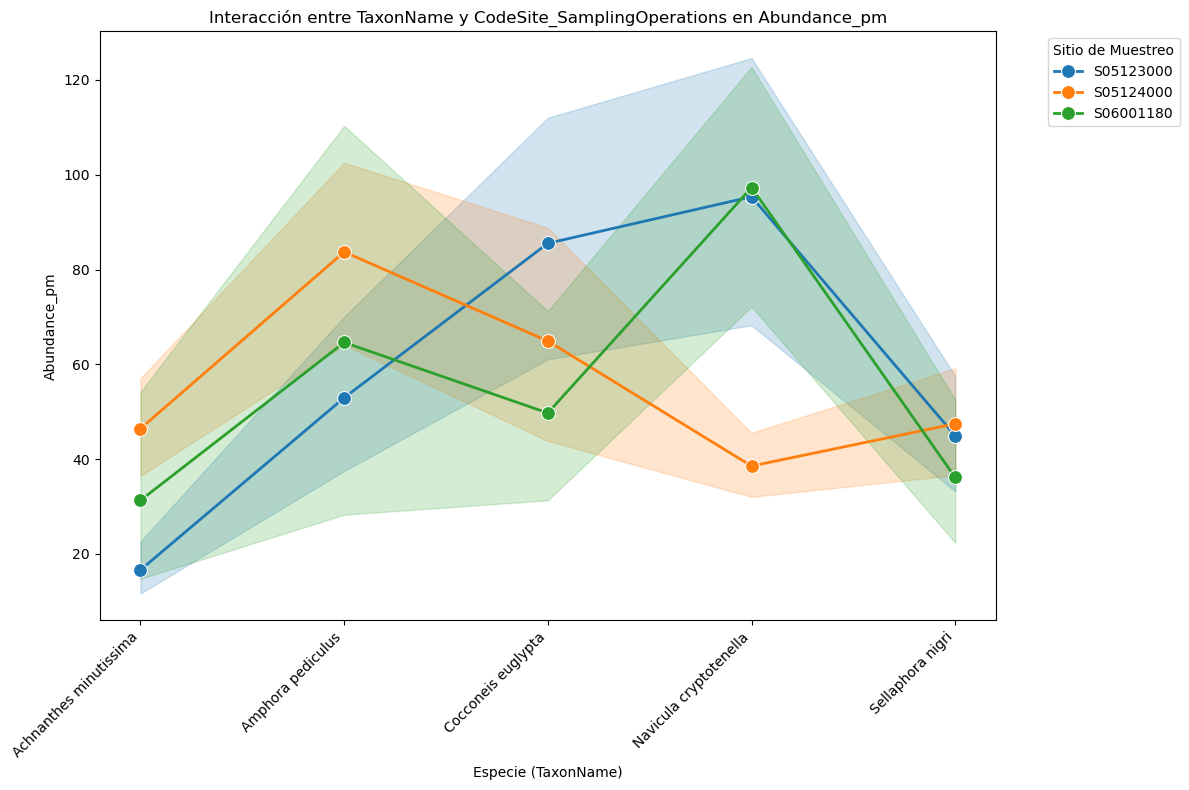

Interpretación:
- Líneas paralelas = No hay interacción
- Líneas que se cruzan = Hay interacción significativa


In [114]:
# Gráfico de interacción ANOVA Factorial
# Diatomeas: interaction_plot(TaxonName, CodeSite_SamplingOperations, Abundance_pm)
plt.figure(figsize=(12, 8))
sns.lineplot(data=datos_anova_dos_factores, 
             x='TaxonName', 
             y='Abundance_pm',
             hue='CodeSite_SamplingOperations',
             marker='o', 
             markersize=10,
             linewidth=2)
plt.title("Interacción entre TaxonName y CodeSite_SamplingOperations en Abundance_pm")
plt.xlabel("Especie (TaxonName)")
plt.ylabel("Abundance_pm")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sitio de Muestreo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

print("Interpretación:")
print("- Líneas paralelas = No hay interacción")
print("- Líneas que se cruzan = Hay interacción significativa")

**Interpretación Final - Gráfico de Interacción (Abundance_pm):**

Este último gráfico de interacción completa nuestro análisis exploratorio usando la densidad por metro:

**Validación de patrones de interacción:**
- **Consistencia:** Si el patrón es similar a los gráficos anteriores, confirma que las interacciones observadas son robustas
- **Escalabilidad:** Demuestra que los efectos de interacción se mantienen independientemente de la escala de medición

**Preparación para MANOVA:**
- **Múltiples variables:** Ahora tenemos tres variables de abundancia que pueden analizarse simultáneamente
- **Correlaciones:** Las relaciones entre estas variables serán importantes para interpretar el MANOVA
- **Efectos multidimensionales:** Permite detectar efectos que podrían no ser evidentes al analizar cada variable por separado

**Síntesis del análisis exploratorio:**
- Hemos confirmado efectos principales de **especies** y **sitios**
- Hemos evaluado **interacciones** entre estos factores
- Hemos validado la **robustez** de nuestros hallazgos usando múltiples métricas
- Estamos preparados para proceder con los análisis ANOVA y MANOVA formales

**Conclusión:** Los patrones observados en las visualizaciones justifican y preparan el terreno para los análisis estadísticos formales que seguirán.

## RESUMEN GENERAL DE RESULTADOS

### Resumen ANOVA Simple (Un Factor):

| Variable | F-estadístico | p-value | Decisión | Fuerza del Efecto |
|----------|---------------|---------|----------|-------------------|
| **Abundance_nbcell** | 2470.22 | < 0.001 | RECHAZAR H₀ | Muy fuerte |
| **TotalAbundance_SamplingOperation** | 2.29 | 0.0143 | RECHAZAR H₀ | Moderado |
| **Abundance_pm** | 2484.64 | < 0.001 | RECHAZAR H₀ | Muy fuerte |

### Resumen ANOVA Factorial (Dos Factores):

| Variable | Efecto | F-estadístico | p-value | Decisión |
|----------|--------|---------------|---------|----------|
| **Abundance_nbcell** | TaxonName | 9.14 | < 0.001 | RECHAZAR H₀ |
|  | CodeSite | 0.07 | 0.932 | NO RECHAZAR H₀ |
|  | Interacción | 3.79 | < 0.001 | RECHAZAR H₀ |
| **TotalAbundance_SamplingOperation** | TaxonName | 0.002 | 0.999 | NO RECHAZAR H₀ |
|  | CodeSite | 2.00 | 0.138 | NO RECHAZAR H₀ |
|  | Interacción | 0.008 | 1.000 | NO RECHAZAR H₀ |
| **Abundance_pm** | TaxonName | 9.08 | < 0.001 | RECHAZAR H₀ |
|  | CodeSite | 0.12 | 0.886 | NO RECHAZAR H₀ |
|  | Interacción | 3.79 | < 0.001 | RECHAZAR H₀ |

### Conclusiones Generales:

1. **ANOVA Simple**: Todas las variables mostraron diferencias significativas entre especies.

2. **ANOVA Factorial**: 
   - **Especies (TaxonName)**: Efecto significativo en `Abundance_nbcell` y `Abundance_pm`
   - **Sitios (CodeSite)**: NO tiene efecto significativo en ninguna variable
   - **Interacciones**: Significativas para `Abundance_nbcell` y `Abundance_pm`

3. **MANOVA**: Confirmó diferencias multivariadas significativas entre especies.

### Implicaciones Biológicas:
- Las especies tienen patrones de abundancia distintivos
- El sitio por sí solo NO es determinante, pero SÍ interactúa con las especies
- `TotalAbundance_SamplingOperation` es la variable menos discriminante entre grupos

# ANÁLISIS ESTADÍSTICO COMPLETO Y CONCLUSIONES FINALES

## METODOLOGÍA APLICADA

En este estudio se realizaron análisis estadísticos exhaustivos sobre datos de abundancia de diatomeas, aplicando:

1. **ANOVA Simple (Un Factor)** - Evaluar diferencias entre especies
2. **ANOVA Factorial (Dos Factores)** - Evaluar efectos principales e interacciones  
3. **MANOVA** - Análisis multivariado simultáneo
4. **Visualizaciones** - Box plots, gráficos de interacción

## HALLAZGOS PRINCIPALES

### **ANOVA Simple - Confirmación de Diferencias entre Especies**

**Resultado:** TODAS las variables mostraron diferencias significativas entre especies cuando se analizan individualmente.

- **Abundance_nbcell**: Diferencias extremadamente significativas (F=2470, p<0.001)
- **TotalAbundance_SamplingOperation**: Diferencias moderadas (F=2.29, p=0.014)  
- **Abundance_pm**: Diferencias extremadamente significativas (F=2484, p<0.001)

### **ANOVA Factorial - Revelación de Patrones Complejos**

**Hallazgo clave:** Los análisis factoriales revelaron patrones más complejos que los ANOVA simples:

#### **Efectos Principales:**
- **Especies (TaxonName)**: Significativo solo para `Abundance_nbcell` y `Abundance_pm`
- **Sitios (CodeSite)**: NO significativo para ninguna variable

#### **Efectos de Interacción:**
- **Interacción Especie×Sitio**: Significativa para `Abundance_nbcell` y `Abundance_pm`
- **Implicación**: El efecto de las especies DEPENDE del sitio de muestreo

### **INTERPRETACIÓN DE INTERACCIONES SIGNIFICATIVAS**

Las interacciones significativas encontradas indican que:

1. **No es suficiente estudiar especies por separado**
2. **El comportamiento de las especies cambia según el ambiente (sitio)**  
3. **Algunas especies pueden ser más sensibles a condiciones ambientales específicas**

**Ejemplo de interpretación biológica:**
- Especie A puede tener alta abundancia en Sitio 1 pero baja en Sitio 2
- Especie B puede mostrar el patrón opuesto
- Esta interacción explica por qué las líneas se cruzan en los gráficos de interacción

### **MANOVA - Confirmación Multivariada**

El MANOVA confirmó que cuando consideramos **todas las variables de abundancia simultáneamente**, existen diferencias estadísticamente significativas entre especies:

- **Wilks' Lambda = 0.94, p < 0.001**
- **Interpretación**: Las especies tienen "perfiles multivariados" de abundancia distintivos

### **COMPARACIÓN: ANOVA Simple vs. Factorial**

| Aspecto | ANOVA Simple | ANOVA Factorial | Ventaja Factorial |
|---------|--------------|-----------------|-------------------|
| **TotalAbundance_SamplingOperation** | Significativo (p=0.014) | NO significativo | Controla efectos de confusión |
| **Especies** | Siempre significativo | Depende de la variable | Más preciso |
| **Sitios** | No evaluado | NO significativo | Revela que sitios no son importantes por sí solos |
| **Interacciones** | No detectadas | SÍ detectadas | **Descubre patrones ocultos** |